#### Loan Application Approval/Rejection EDA and Prediction

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore');
pd.options.display.float_format = '{:.4f}'.format
df=pd.read_csv("loan_approval_prediction_dataset.csv")

In [24]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [18]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [27]:
df.select_dtypes(include=['object']).columns

Index(['education', 'self_employed', 'loan_status'], dtype='object')

In [15]:
df.isna().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [6]:
df.loc[df.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


In [9]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000,4269.0000
mean,2135.0000,2.4987,5059123.9166,15133450.4568,10.9004,599.9361,7472616.5378,4973155.3057,15126305.9264,4976692.4338
std,1232.4985,1.6959,2806839.8318,9043362.9848,5.7092,172.4304,6503636.5877,4388966.0896,9103753.6653,3250185.3057
min,1.0000,0.0000,200000.0000,300000.0000,2.0000,300.0000,-100000.0000,0.0000,300000.0000,0.0000
25%,1068.0000,1.0000,2700000.0000,7700000.0000,6.0000,453.0000,2200000.0000,1300000.0000,7500000.0000,2300000.0000
50%,2135.0000,3.0000,5100000.0000,14500000.0000,10.0000,600.0000,5600000.0000,3700000.0000,14600000.0000,4600000.0000
75%,3202.0000,4.0000,7500000.0000,21500000.0000,16.0000,748.0000,11300000.0000,7600000.0000,21700000.0000,7100000.0000
max,4269.0000,5.0000,9900000.0000,39500000.0000,20.0000,900.0000,29100000.0000,19400000.0000,39200000.0000,14700000.0000


In [14]:
df.select_dtypes(include=['object']).columns

Index([' education', ' self_employed', ' loan_status'], dtype='object')

#### Removing the whitespaces from the column names

In [19]:
df.columns=df.columns.str.replace(" ","")

In [31]:
df.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
523,524,4,Not Graduate,Yes,7100000,27900000,10,328,9000000,13400000,26500000,7700000,Rejected
3744,3745,4,Not Graduate,Yes,9200000,29100000,10,731,14500000,8300000,35800000,5000000,Approved
4037,4038,4,Graduate,Yes,600000,1400000,4,761,800000,500000,2100000,300000,Approved
2713,2714,5,Not Graduate,Yes,4000000,8200000,2,571,3500000,7700000,9500000,4400000,Approved
3615,3616,5,Graduate,No,8100000,25300000,8,796,15900000,12600000,21500000,7800000,Approved


#### Count plots

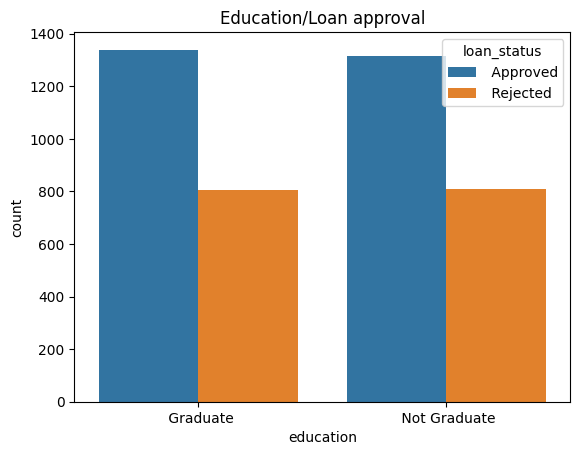

In [32]:
sns.countplot(x=df['education'],hue=df['loan_status'])
plt.title('Education/Loan approval');

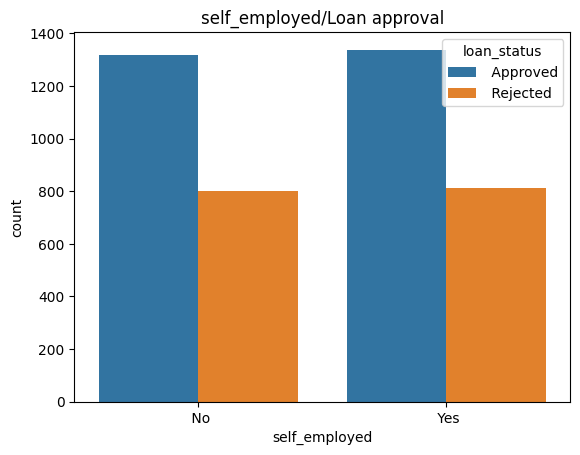

In [33]:
sns.countplot(x=df['self_employed'],hue=df['loan_status'])
plt.title('self_employed/Loan approval');

Text(0.5, 1.0, 'Loan terms')

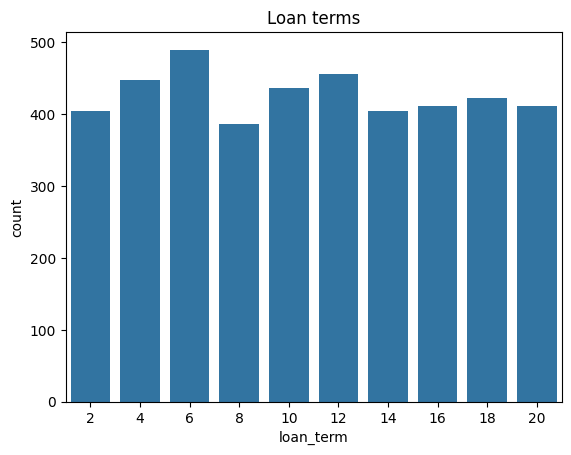

In [34]:
sns.countplot(x=df['loan_term'])
plt.title("Loan terms")

In [35]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [36]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [37]:
df.groupby(['education','self_employed'])[['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value','loan_amount','income_annum']].agg('mean')

residential_assets_value  \
education     self_employed                             
 Graduate      No                        7.528558e+06   
               Yes                       7.558673e+06   
 Not Graduate  No                        7.330680e+06   
               Yes                       7.467580e+06   

                             commercial_assets_value  luxury_assets_value  \
education     self_employed                                                 
 Graduate      No                       5.038384e+06         1.514876e+07   
               Yes                      4.845782e+06         1.533280e+07   
 Not Graduate  No                       5.067864e+06         1.501932e+07   
               Yes                      4.941918e+06         1.500566e+07   

                             bank_asset_value   loan_amount  income_annum  
education     self_employed                                                
 Graduate      No                5.022498e+06  1.519697e+07  5.081175e+06  
               Yes               4.991374e+06  1.526237e+07  5.102370e+06  
 Not Graduate  No                4.929709e+06  1.503913e+07  5.022039e+06  
               Yes               4.961187e+06  1.503479e+07  5.030411e+06

In [39]:
# label encoding the loan_status
labelencoder=LabelEncoder()
df['loan_status']=labelencoder.fit_transform(df['loan_status'])

In [40]:
dict(zip(labelencoder.classes_, range(len(labelencoder.classes_))))

{0: 0, 1: 1}

In [45]:
df.groupby('loan_term')['loan_status'].value_counts().unstack('loan_status').nlargest(10,columns=1).rename(columns={0:'Approved',1:'Rejected'})

loan_status,Approved,Rejected
loan_term,,
6,282,208
10,229,207
12,276,180
16,236,176
20,236,175
8,220,166
14,239,166
18,257,165
2,315,89


#### Pair hist plot to compare the different assets of approved and reject loan applications

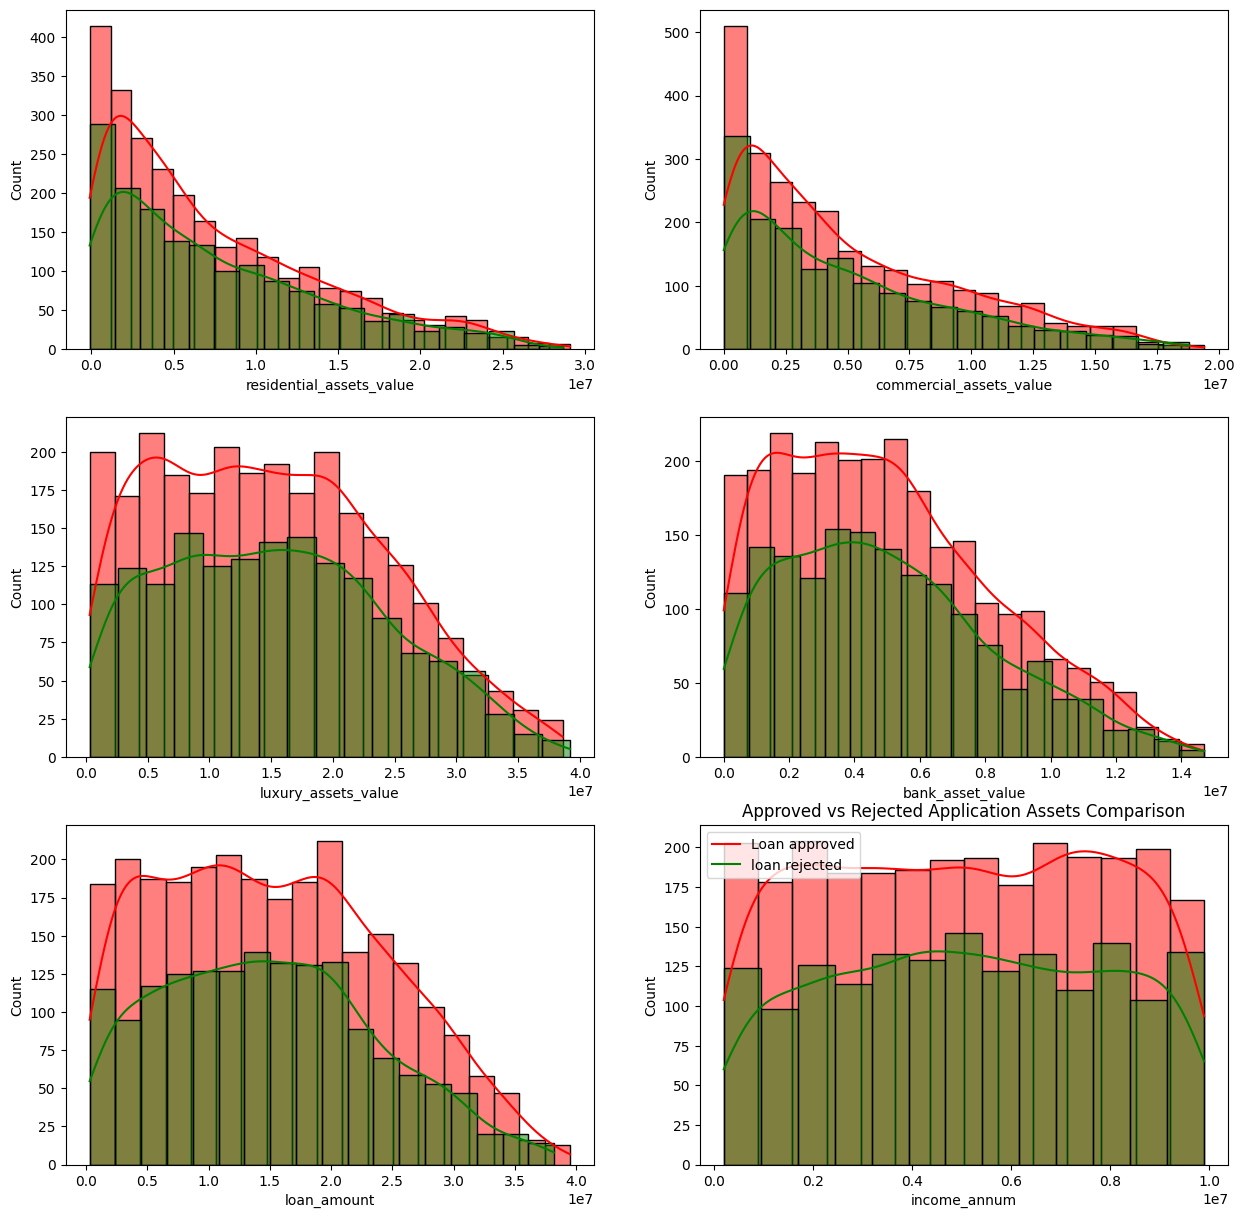

In [20]:
hist_cols=['residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value','loan_amount','income_annum']
fig,axs=plt.subplots(3,2,figsize=(15,15))
for i, col in enumerate(hist_cols):
    row=i//2
    column=i%2
    df1=df[df.loan_status==0]  
#     df1 is approved loans
    df2=df[df.loan_status==1]
#     df2 is rejected loans
   
    sns.histplot(df1[col],color='red',ax=axs[row,column],fill=True,kde=True)
    sns.histplot(df2[col],color='green',ax=axs[row,column],fill=True,kde=True)
    
    

plt.legend(['Loan approved','loan rejected'],loc='upper left')
plt.title("Approved vs Rejected Application Assets Comparison")
plt.show()
# so this tells that, people who have more luxary and bank assets have more chances of getting the loan approved 

#### cibil score of approved vs reject applications

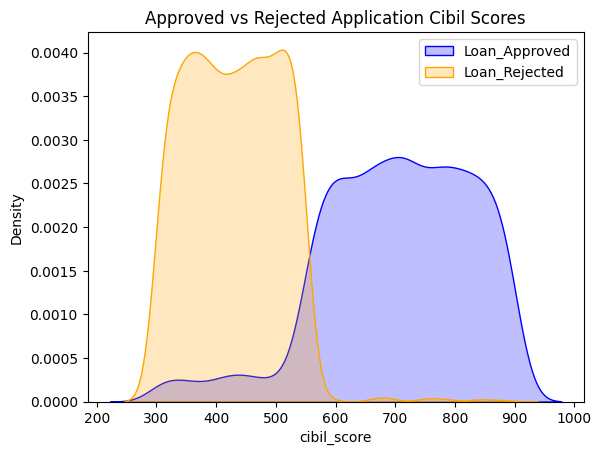

In [21]:
sns.kdeplot(df1['cibil_score'],fill=True,color='blue')
sns.kdeplot(df2['cibil_score'],fill=True,color='orange')
plt.title('Approved vs Rejected Application Cibil Scores')
plt.legend(['Loan_Approved','Loan_Rejected'])
# the cibil scores of people who got their loan approved has better cibil score

In [22]:
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

#### StandardScaler

In [23]:
scaler=StandardScaler()
standardize_cols=[
       'income_annum', 'loan_amount', 
       'residential_assets_value', 'commercial_assets_value','cibil_score',
       'luxury_assets_value', 'bank_asset_value']
for col in standardize_cols:
    df[col]=scaler.fit_transform(df[[col]])

#### Label encoding

In [24]:
labelencoder=LabelEncoder()
categorical_cols=['no_of_dependents', 'education', 'self_employed','loan_status']
for col in categorical_cols:
    df[col]=labelencoder.fit_transform(df[col])

In [25]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,1.617979,1.633052,12,1.032792,-0.780058,2.877289,0.832028,0.930304,0
1,2,0,1,1,-0.341750,-0.324414,8,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936,1
2,3,3,0,0,1.439822,1.610933,20,-0.544840,-0.057300,-0.107818,1.996520,2.407316,1
3,4,3,0,0,1.119139,1.721525,8,-0.771045,1.649637,-0.381263,0.897943,0.899533,1
4,5,5,1,1,1.689242,1.002681,20,-1.264055,0.757724,0.735304,1.568075,0.007172,1


#### HeatMap

Text(0.5, 1.0, 'HeatMap')

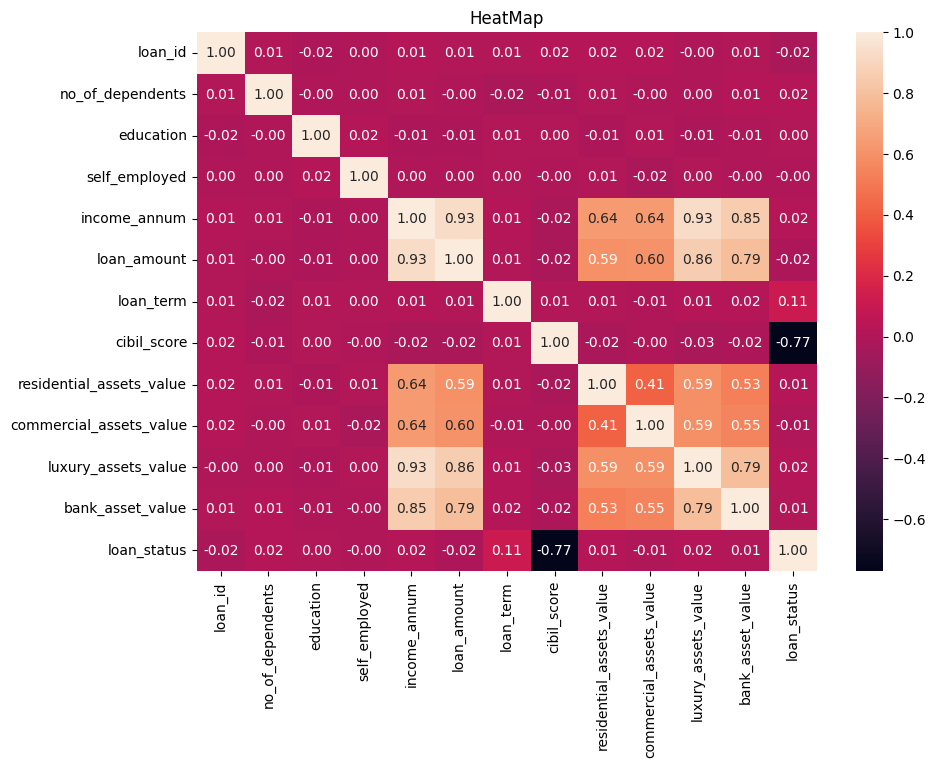

In [26]:
corr=df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,fmt=".2f")
plt.title('HeatMap')

#### Model_Creation

In [27]:
X=df[['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value']]
y=df['loan_status']

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.4,random_state=43)
model=LogisticRegression(max_iter=1500)
model.fit(X_train,y_train)
predicted_y=model.predict(X_test)
print("accuracy score: ",accuracy_score(predicted_y,y_test))
print("precision score: ",precision_score(predicted_y,y_test))
print('confusion  matric: ',confusion_matrix(predicted_y,y_test))

accuracy score:  0.9192037470725996
precision score:  0.8672839506172839
confusion  matric:  [[1008   86]
 [  52  562]]


In [29]:
print("0 means approved : 1 means reject")
print('Classification Report: '," \n",classification_report(predicted_y,y_test))


0 means approved : 1 means reject
Classification Report:   
               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1094
           1       0.87      0.92      0.89       614

    accuracy                           0.92      1708
   macro avg       0.91      0.92      0.91      1708
weighted avg       0.92      0.92      0.92      1708

